In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('../ClassificationDatasets/income_evaluation.csv')


## Change name of column names 

In [7]:
# let's change the column name first 
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names


In [8]:
# let's describe the data including object type 
df.describe(include='all').T

count unique                  top   freq     mean      std  \
age             32561    NaN                  NaN    NaN  38.5816  13.6404   
workclass       32561      9              Private  22696      NaN      NaN   
fnlwgt          32561    NaN                  NaN    NaN   189778   105550   
education       32561     16              HS-grad  10501      NaN      NaN   
education_num   32561    NaN                  NaN    NaN  10.0807  2.57272   
marital_status  32561      7   Married-civ-spouse  14976      NaN      NaN   
occupation      32561     15       Prof-specialty   4140      NaN      NaN   
relationship    32561      6              Husband  13193      NaN      NaN   
race            32561      5                White  27816      NaN      NaN   
sex             32561      2                 Male  21790      NaN      NaN   
capital_gain    32561    NaN                  NaN    NaN  1077.65  7385.29   
capital_loss    32561    NaN                  NaN    NaN  87.3038   402.96   
hours_per_week  32561    NaN                  NaN    NaN  40.4375  12.3474   
native_country  32561     42        United-States  29170      NaN      NaN   
income          32561      2                <=50K  24720      NaN      NaN   

                  min     25%     50%     75%          max  
age                17      28      37      48           90  
workclass         NaN     NaN     NaN     NaN          NaN  
fnlwgt          12285  117827  178356  237051  1.48470e+06  
education         NaN     NaN     NaN     NaN          NaN  
education_num       1       9      10      12           16  
marital_status    NaN     NaN     NaN     NaN          NaN  
occupation        NaN     NaN     NaN     NaN          NaN  
relationship      NaN     NaN     NaN     NaN          NaN  
race              NaN     NaN     NaN     NaN          NaN  
sex               NaN     NaN     NaN     NaN          NaN  
capital_gain        0       0       0       0        99999  
capital_loss        0       0       0       0         4356  
hours_per_week      1      40      40      45           99  
native_country    NaN     NaN     NaN     NaN          NaN  
income            NaN     NaN     NaN     NaN          NaN

### let's check the data has null values or not 


In [9]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [10]:
# let's dig the categorical data
categorical = [var for var in df.columns if df[var].dtype=='O']


In [11]:
print('There are {} categorical variables'.format(len(categorical)))

print('The categorical variables are :',categorical)

There are 9 categorical variables
The categorical variables are : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
# let's preview the categorical 
df[categorical].head()


workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

#### checking the target variable

In [13]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

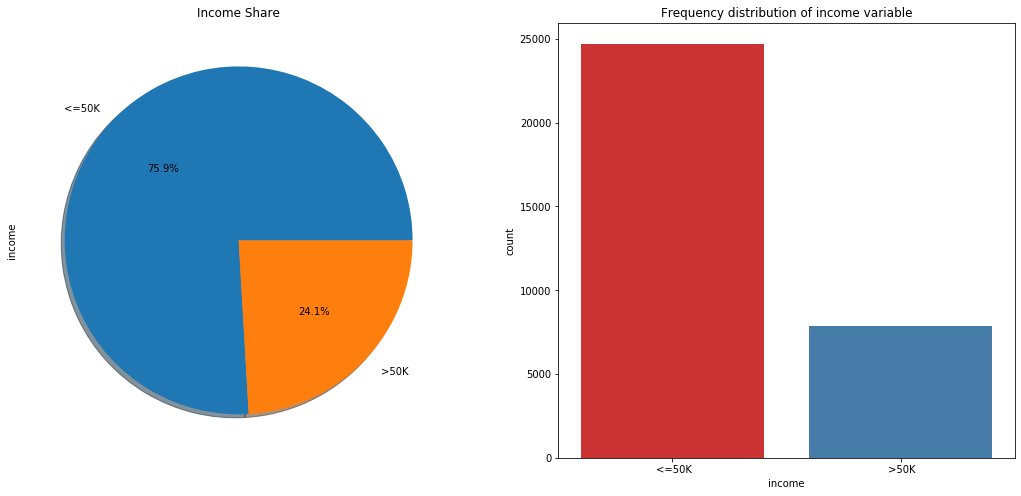

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

In [15]:
# let's check the each categorical data from inside 
#for i in categorical:
 #   print(i,'\n',df[i].value_counts(), '\n\n')

* from above we can see there are some missing values which are in format of **"?"** 
* we will replace that ? to Nan values and then we will deal it .. either we can drop the rows or we can perform some aggregation to fill the data

In [16]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)


In [17]:
df.isnull().mean()

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    0.017905
income            0.000000
dtype: float64

* so here are those missing values 

### I am going to change the missing values to most appearing values i.e with the mode of the values


In [18]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Encoding, because categorical data 

In [20]:
# using category encoder on all categorical data
import category_encoders as ce
from sklearn.model_selection import train_test_split


In [21]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, random_state=100)

In [23]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [24]:
[X_train.shape, X_test.shape]

[(26048, 105), (6513, 105)]

### So now our data is cleaned and also the data is one hot encoded so it's ready to use it for modeling 

* I am going to use several models to do classification.
### 1) Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
def metricss(y_test, y_pred):
    print('Classification Report\n',classification_report(y_test, y_pred))
    print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
    

In [27]:
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      4908
        >50K       0.78      0.27      0.40      1605

    accuracy                           0.80      6513
   macro avg       0.79      0.62      0.64      6513
weighted avg       0.80      0.80      0.76      6513

Confusion Matrix
 [[4787  121]
 [1169  436]]


* Here Accuracy of the model is good but when we create the classification reports recall rate when >50k is so less and F1-score is also not good 
* Also the confusion matrix shows that the true positive values are not that much so we need to work on it.

### 2) Decision Tree Classifier 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
dtc = DecisionTreeClassifier(max_depth=9)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      4908
        >50K       0.78      0.58      0.66      1605

    accuracy                           0.85      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix
 [[4643  265]
 [ 682  923]]


In [32]:
# ploting tree with max depth of 4 
# feature names are given which are self explainatory 
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(dtc,max_depth=4, feature_names=X_train.columns ,fontsize=30)
plt.savefig('dt_saved1')
plt.close()


* Let's perform some hyper-parameter tuning and try to do some good prediction.
* Here accuracy is good but the recall and f1score is not showing good results. 
#### Let's try the random forest classifier on same dataset 

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
d = DecisionTreeClassifier()
param = {
    "max_depth": np.arange(1, 20,3),
    "min_samples_split": [0.1, 0.3, 0.5],
    "max_features": np.arange(1, X_train.shape[1])
}
rsv = RandomizedSearchCV(d, param_distributions=param)

In [35]:
rsv.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'max_features': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
                                        'min_samples_split': [0.1, 0.3, 0.5]})

In [36]:
y_pred = rsv.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.94      0.91      4908
        >50K       0.77      0.57      0.65      1605

    accuracy                           0.85      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.85      0.84      6513

Confusion Matrix
 [[4632  276]
 [ 691  914]]


In [38]:
# ploting tree with max depth of 4 
# feature names are given which are self explainatory 
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(rsv.best_estimator_,max_depth=4, feature_names=X_train.columns ,fontsize=30)
plt.savefig('dt_saved2')
plt.close()

* after doing the hyper - parameter tuning we got the increase in number of values of True negatives but the true positive value decrease.
* Let's see how Random Forest will behave with this data

### 3) Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4908
        >50K       0.73      0.65      0.68      1605

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Confusion Matrix
 [[4519  389]
 [ 567 1038]]


In [42]:
from sklearn.tree import export_graphviz
# Export as dot file
estimator_limited = rfc.estimators_[5]
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['<=50K', '>50K'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RandomForest.png', '-Gdpi=600'])

0

In [43]:
#from IPython.display import Image
#Image(filename = 'RandomForest.png')


* **As you can see the results are pretty better in RandomForest**
* here recall of the >50k is better. so with this model 64% of the data will get classified positive from whole data.
* let's check how will the model perform after doing hyper-parameter tuning.



In [44]:
param = {
    "max_depth": np.arange(10, 100,10),
    "max_leaf_nodes":np.arange(1, 200,20),
    'n_estimators': [10,50,100]
}
# will try some other hyper-parameters also

In [45]:
r = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param,verbose=False , cv=4)

In [46]:
import warnings 
warnings.filterwarnings('ignore')
r.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_leaf_nodes': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]),
                                        'n_estimators': [10, 50, 100]},
                   verbose=False)

In [47]:
y_pred = r.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4908
        >50K       0.80      0.55      0.65      1605

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix
 [[4692  216]
 [ 719  886]]


In [48]:
estimator_limited = r.best_estimator_.estimators_[1]
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['<=50K', '>50K'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RandomForest_HT.png', '-Gdpi=600'])
#from IPython.display import Image
#Image(filename = 'RandomForest.png')

0

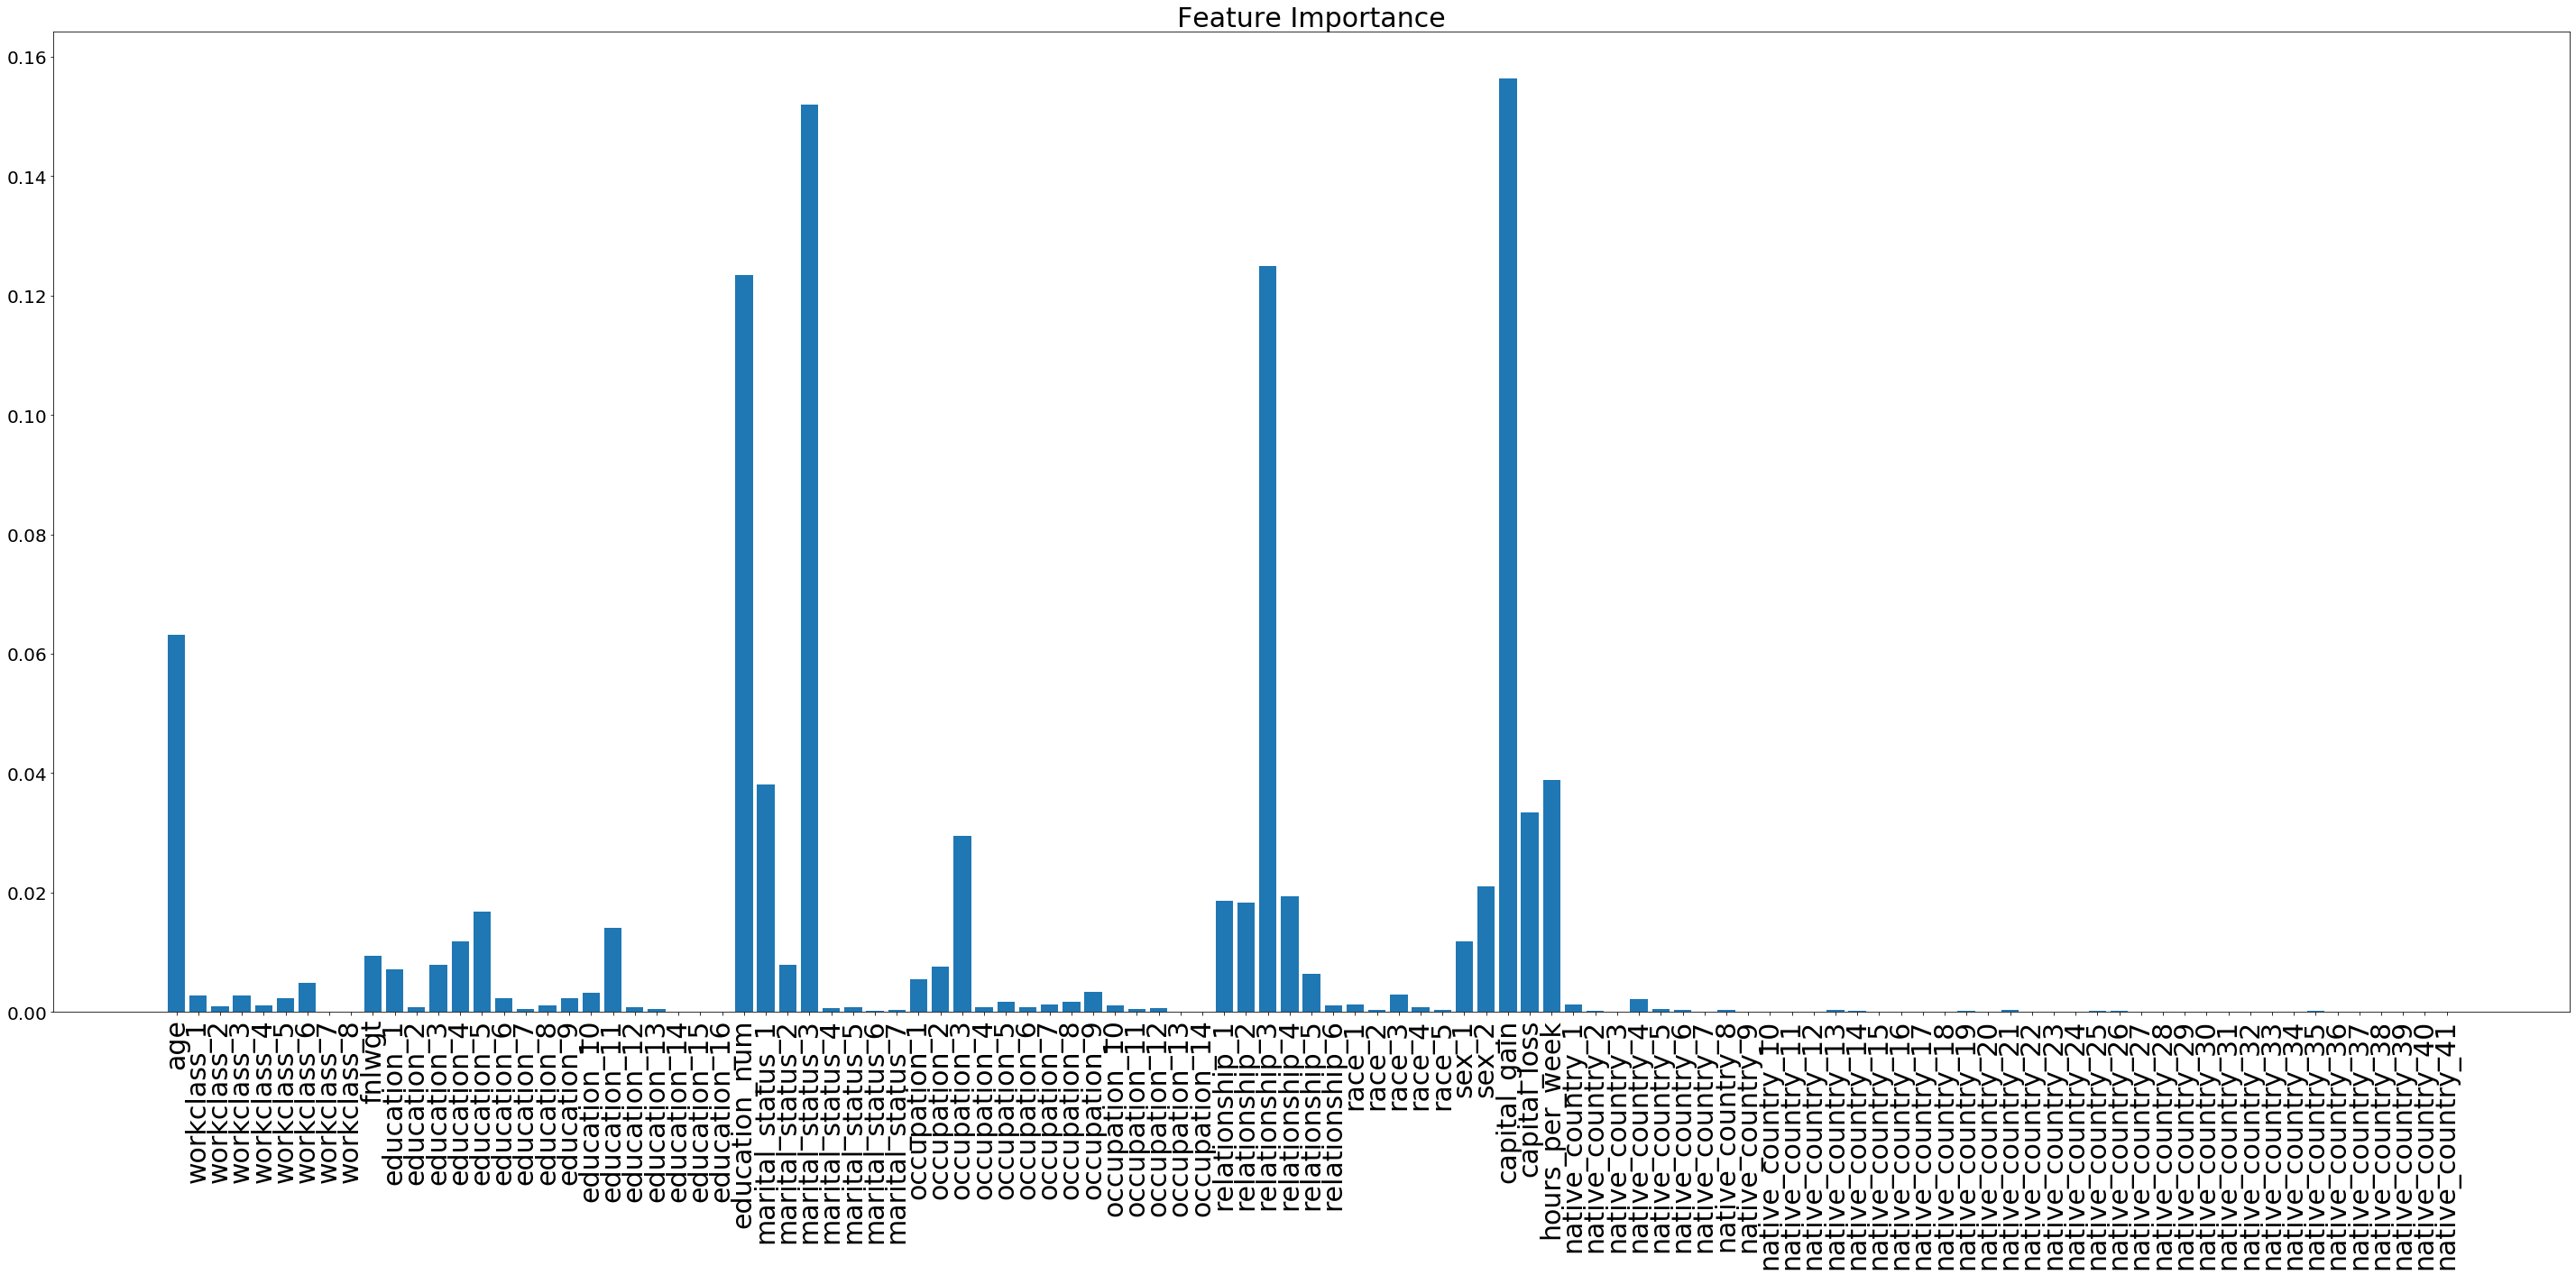

In [50]:
plt.figure(figsize=(50,20))
plt.bar(X_train.columns, r.best_estimator_.feature_importances_)
plt.xticks(rotation='vertical', size=30)
plt.yticks(size=20)
plt.title('Feature Importance', size=30)

plt.show()

**From the graph shows the RF giving importance to which features** 

## 4) GradientBoosting 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=20)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4908
        >50K       0.82      0.52      0.63      1605

    accuracy                           0.85      6513
   macro avg       0.84      0.74      0.77      6513
weighted avg       0.85      0.85      0.84      6513

Confusion Matrix
 [[4721  187]
 [ 774  831]]


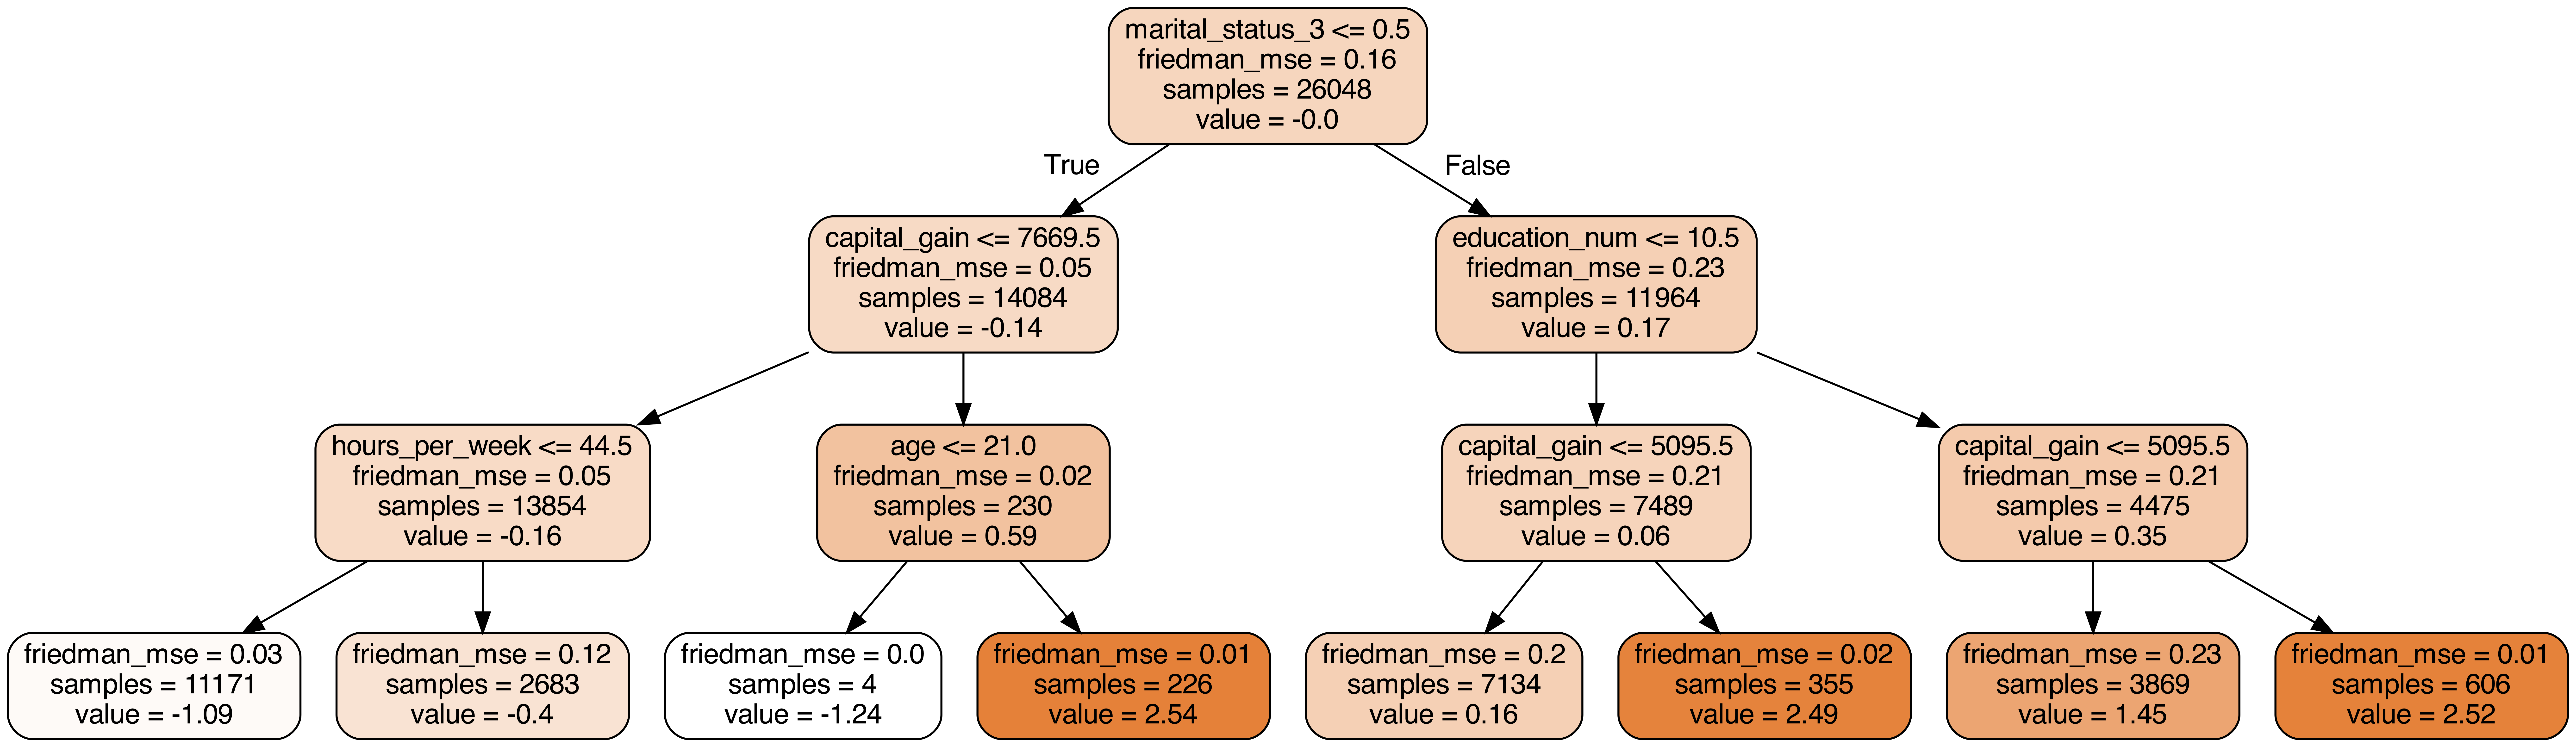

In [52]:
estimator_limited =gbc.estimators_[2,0]
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['<=50K', '>50K'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'GradientBoosting.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'GradientBoosting.png')

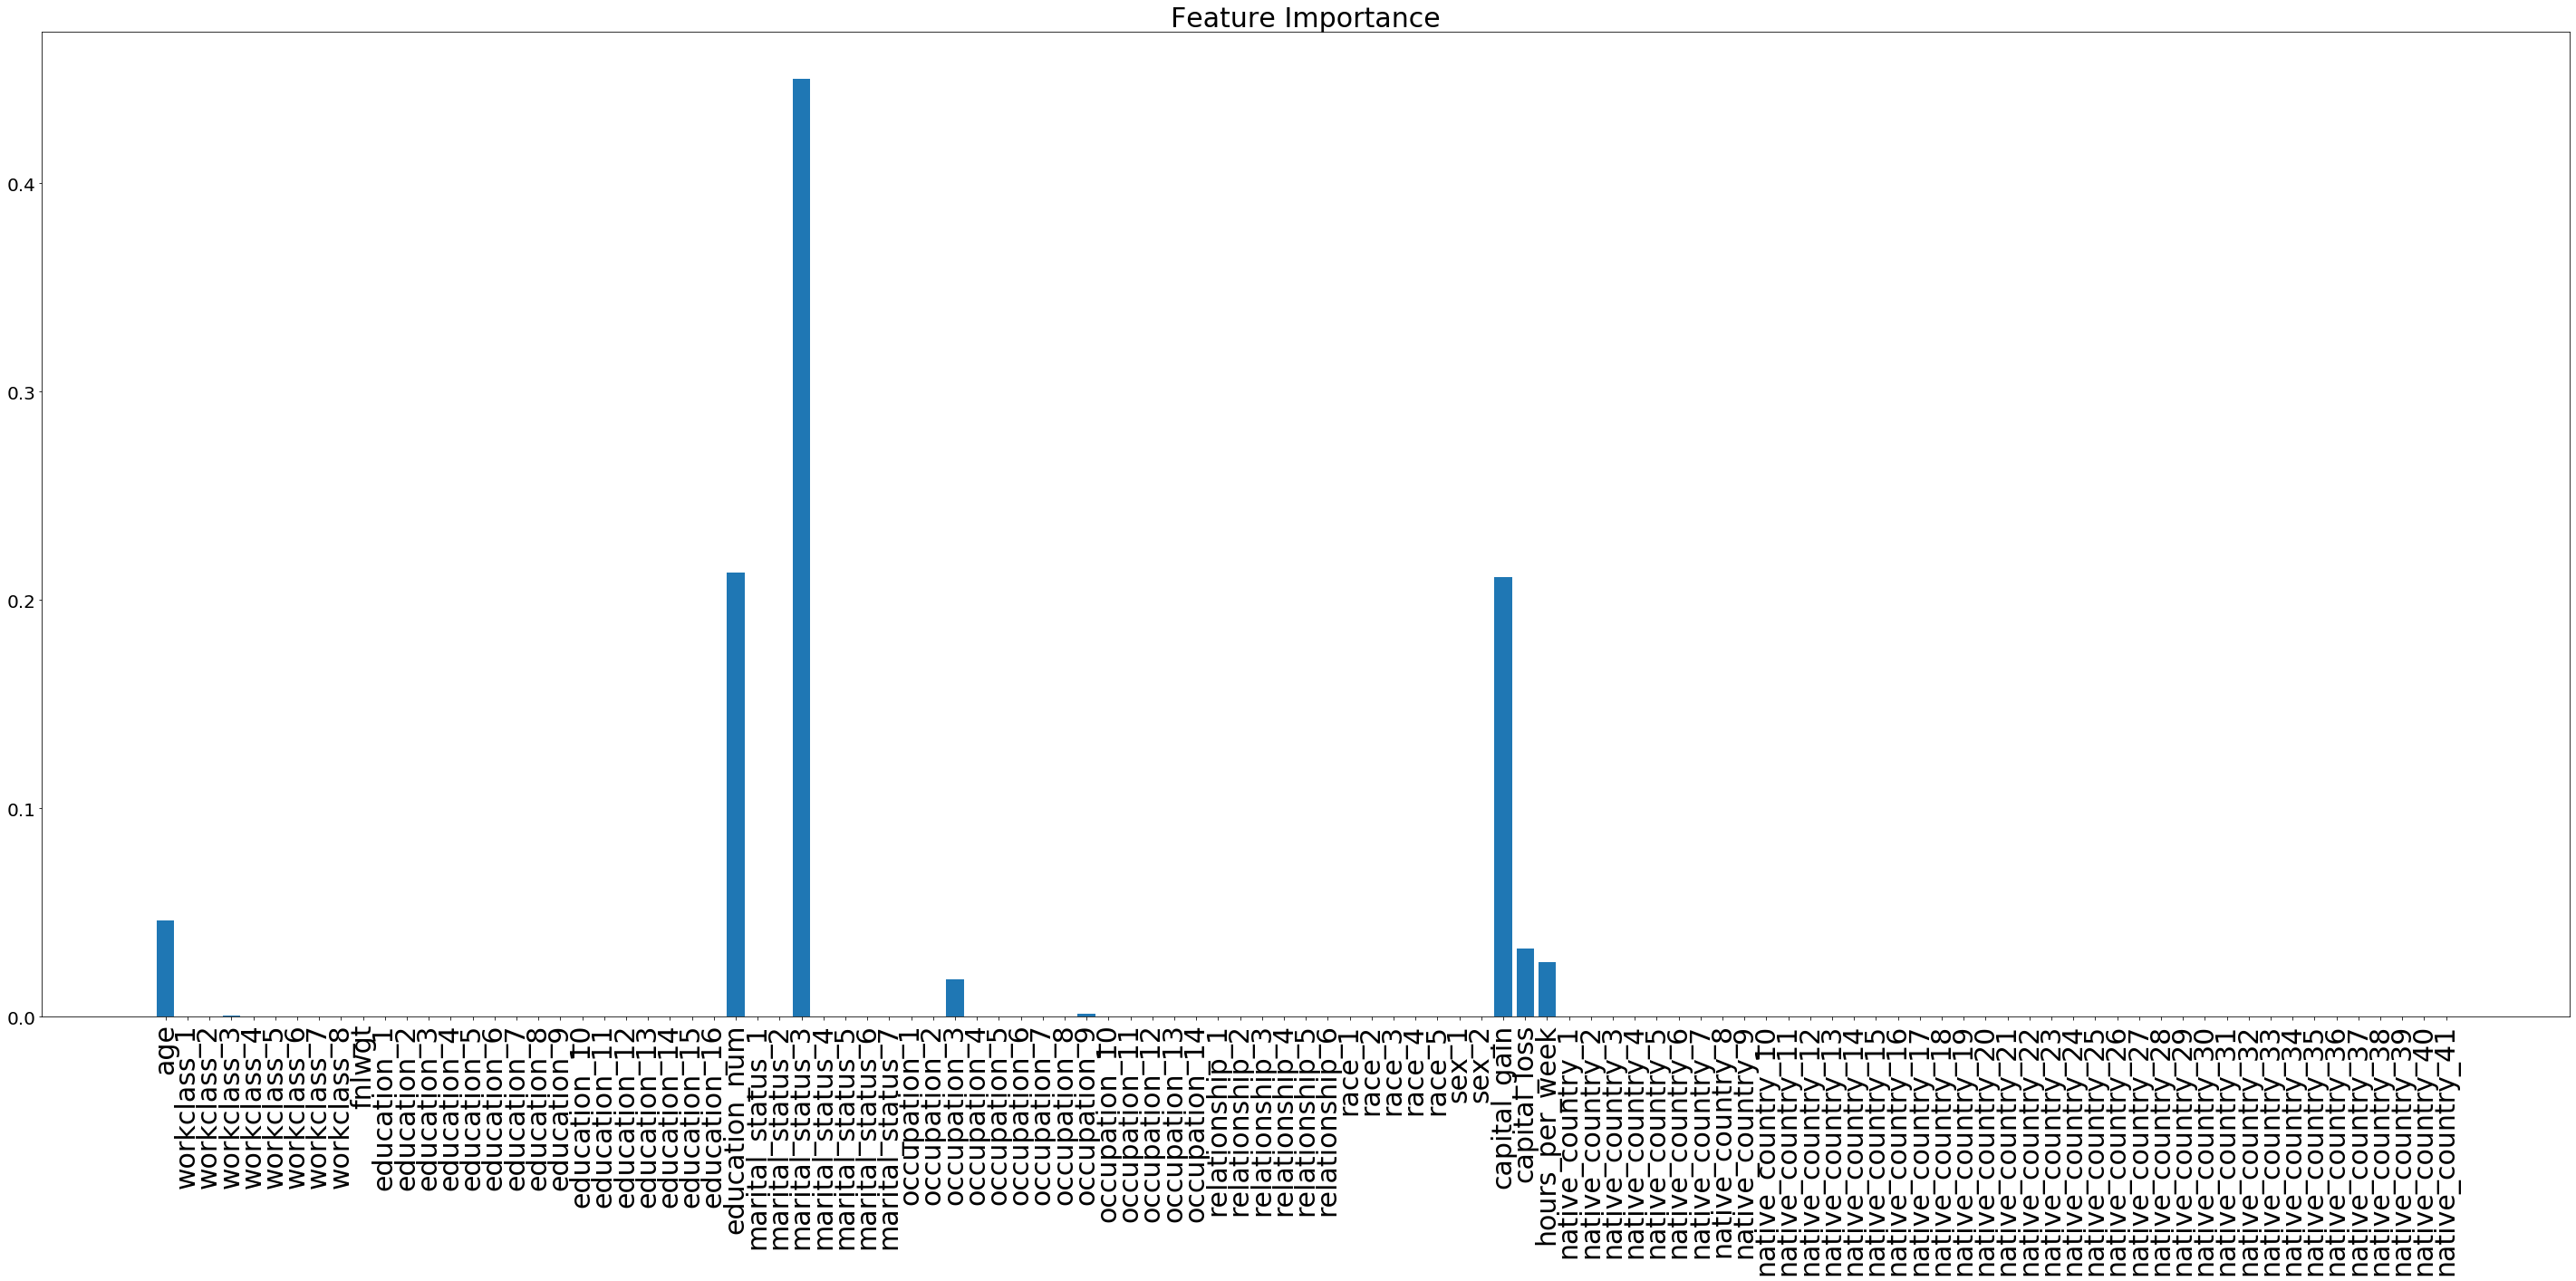

In [53]:
# let's plot feature importance 
plt.figure(figsize=(50,20))
plt.bar(X_train.columns, gbc.feature_importances_)
plt.xticks(rotation='vertical', size=30)
plt.yticks(size=20)
plt.title('Feature Importance', size=30)

plt.show()

In [54]:
param = {
    "learning_rate":[0.1,0.01,0.05],
    "n_estimators":[100, 150, 200],
    "subsample":[0.3,0.7,0.9],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2],
    "max_depth":[3,4,5,6,7,8],
    "max_features":['auto', 'sqrt','log2']
    
}

In [55]:
G = GradientBoostingClassifier()
rc = RandomizedSearchCV(G, param_distributions=param, cv=3 )
rc.fit(X_train, y_train)
y_pred = rc.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4908
        >50K       0.79      0.66      0.72      1605

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

Confusion Matrix
 [[4622  286]
 [ 538 1067]]


* After doing tuning in the hyper-parameters the values are slightly better 


In [56]:
estimator_limited =rc.best_estimator_.estimators_[2,0]
export_graphviz(estimator_limited, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['<=50K', '>50K'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'GradientBoosting_HT.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'GradientBoosting_HT.png')

## 5) Xgboost 

In [57]:
from xgboost import XGBClassifier, XGBRFClassifier

In [58]:
xgbRF = XGBRFClassifier()
xgbc = XGBClassifier()

In [59]:
xgbRF.fit(X_train, y_train)
xgbc.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_pred = xgbRF.predict(X_test)
metricss(y_test, y_pred)

from xgboost import plot_tree, plot_importance


Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4908
        >50K       0.81      0.55      0.66      1605

    accuracy                           0.86      6513
   macro avg       0.84      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix
 [[4703  205]
 [ 716  889]]


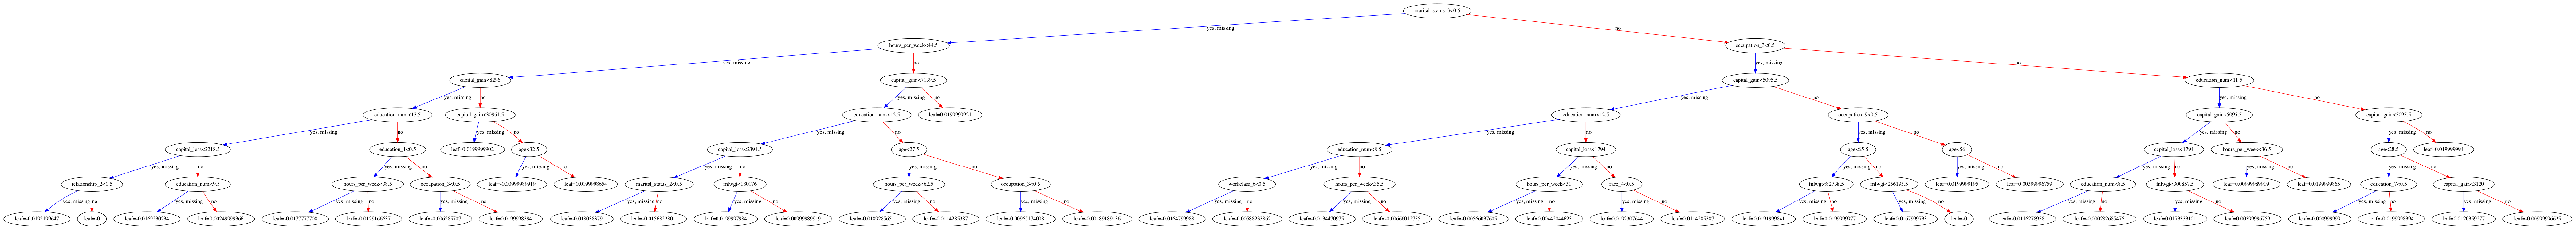

In [61]:
plot_tree(xgbRF, num_trees=2)
fig = plt.gcf()
## size not getting increasing
fig.set_size_inches(150, 100)
fig.savefig('xgboostRF.png')

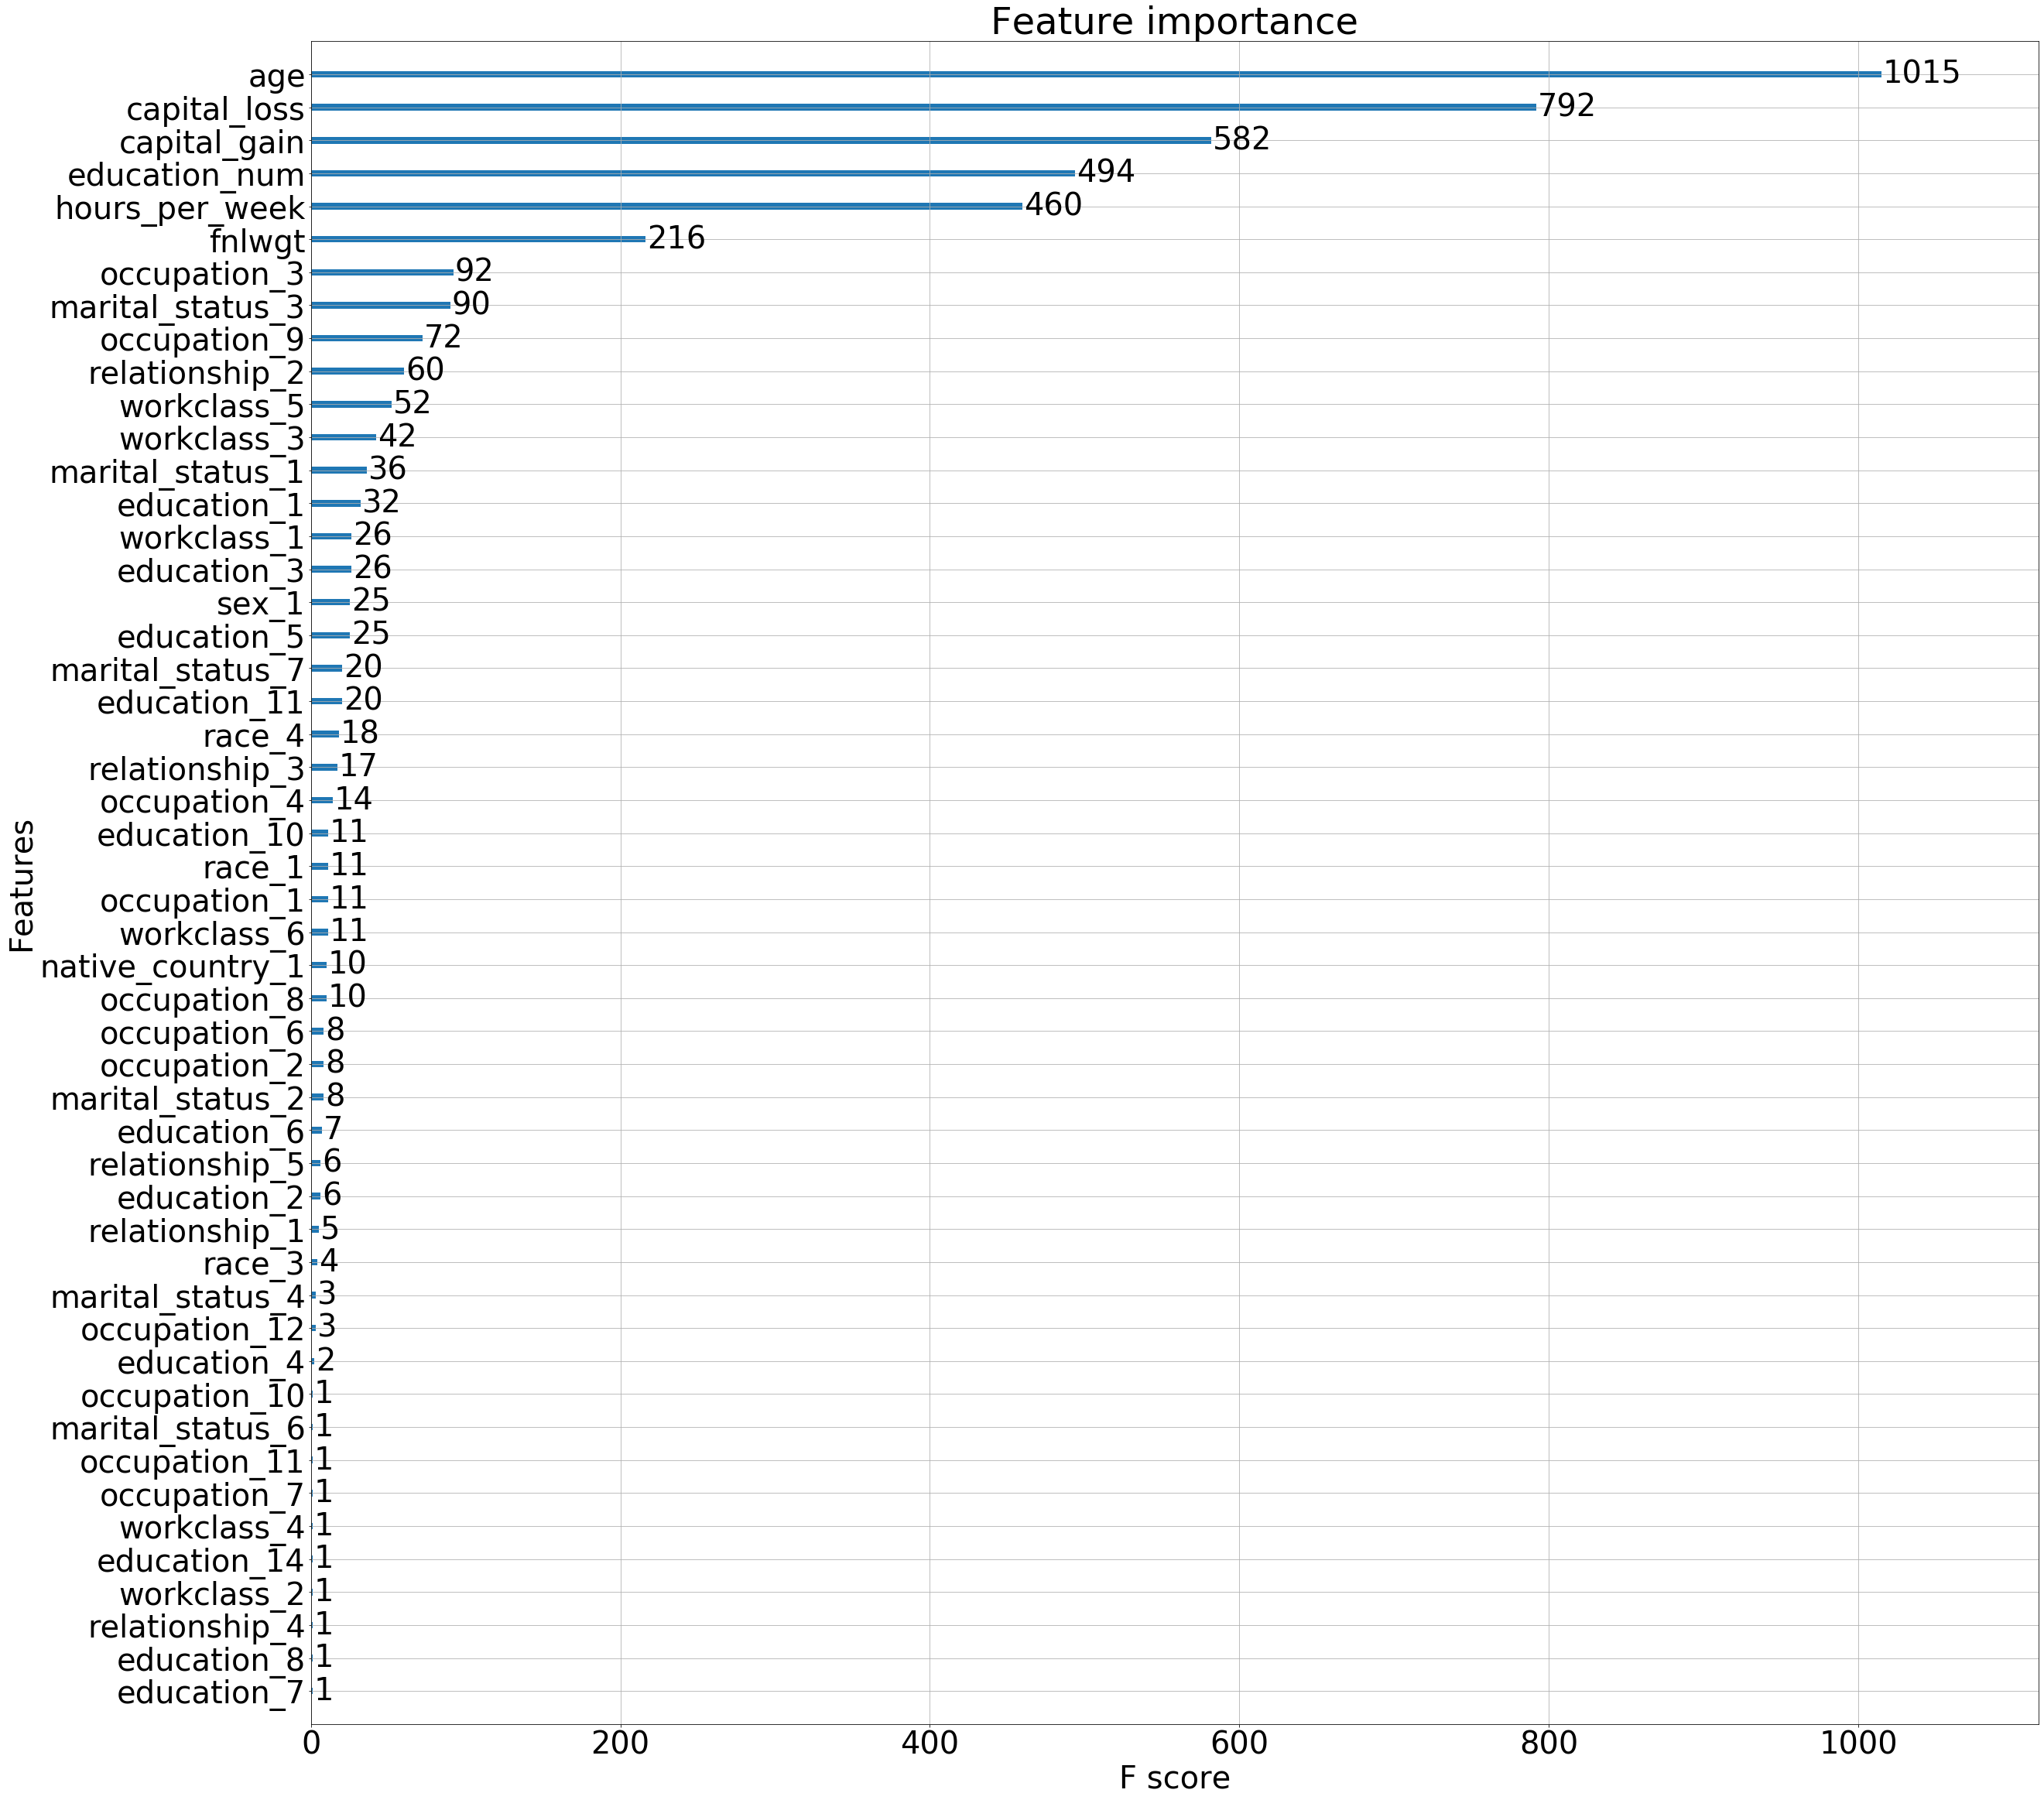

In [62]:
plt.rcParams["figure.figsize"] = (40, 40)
plt.rcParams['font.size'] = 40

plot_importance(xgbRF)
plt.show()

Classification Report
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4908
        >50K       0.78      0.68      0.73      1605

    accuracy                           0.87      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513

Confusion Matrix
 [[4606  302]
 [ 514 1091]]


<Figure size 2880x1080 with 0 Axes>

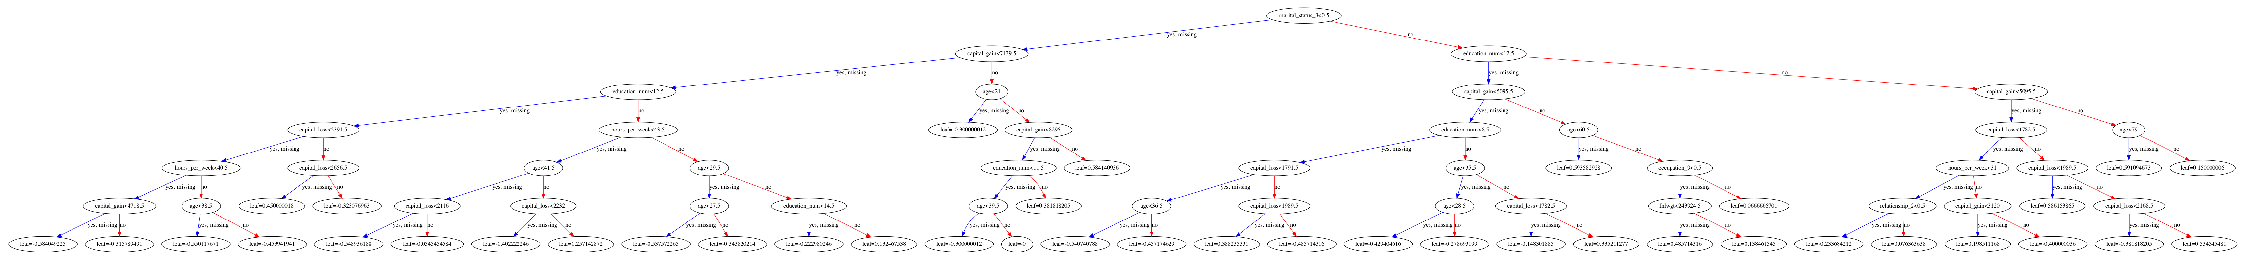

<Figure size 2880x2880 with 0 Axes>

In [63]:
y_pred = xgbc.predict(X_test)
metricss(y_test, y_pred)
plt.figure(figsize=(40,15))
plot_tree(xgbc)

plt.savefig('Xgboost_classifier')
plt.close()

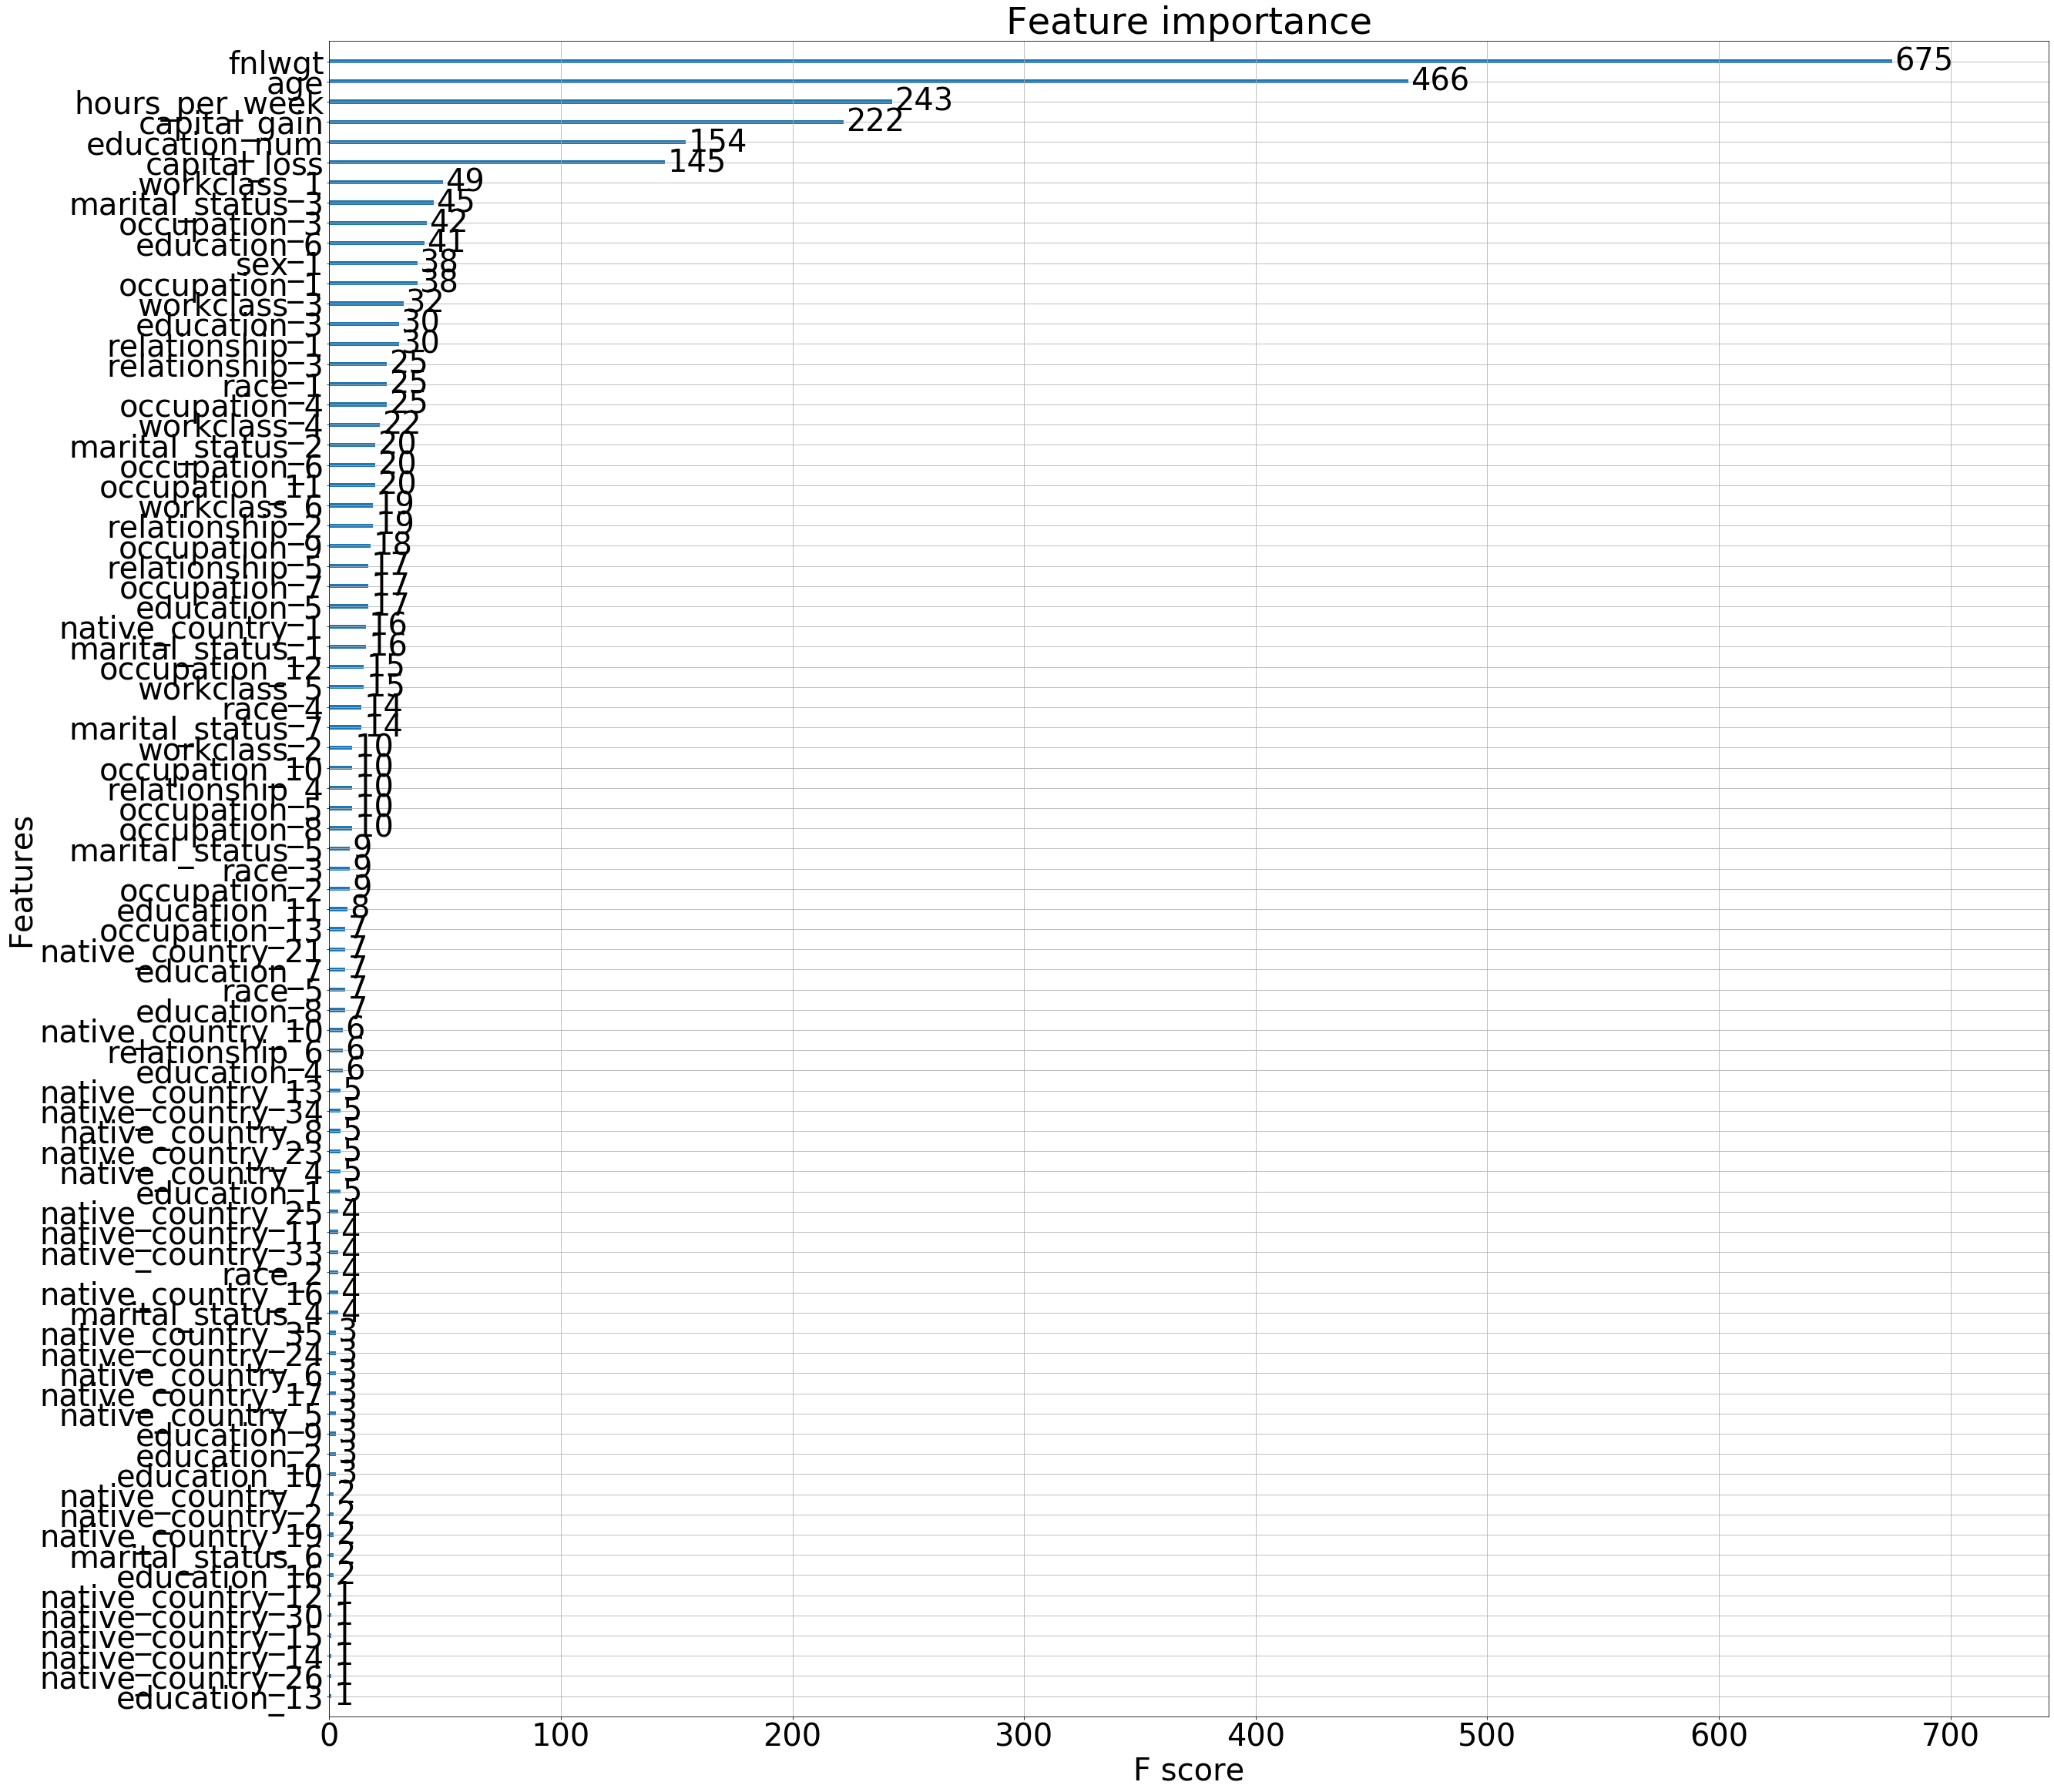

In [64]:
plt.rcParams["figure.figsize"] = (40, 40)
plt.rcParams['font.size'] = 40

plot_importance(xgbc)
plt.show()

In [65]:
param = {
        "max_depth": [3, 4, 5],
        'min_child_weight': np.arange(0.0001, 0.5, 0.001),
        'gamma': np.arange(0.0,40.0,0.005),
        'learning_rate': np.arange(0.0005,0.3,0.0005),
        'subsample': np.arange(0.01,1.0,0.01),
        'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
        "colsample_bytree": np.arange(0.1,1.0,0.01)
}

In [66]:
Xgboost = XGBRFClassifier()
rs = RandomizedSearchCV(Xgboost, param_distributions=param, cv=5)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None, gamma=None,
                                             gpu_id=None,
                                             importance_type='gain',
                                             interaction_constraints=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             obje...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.3

In [67]:
y_pred = rs.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4908
        >50K       0.80      0.55      0.65      1605

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513

Confusion Matrix
 [[4691  217]
 [ 718  887]]


## 6) lightGbm 

In [68]:
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(X_train, y_train)
y_pred = light.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4908
        >50K       0.78      0.68      0.73      1605

    accuracy                           0.87      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.87      0.87      6513

Confusion Matrix
 [[4602  306]
 [ 512 1093]]


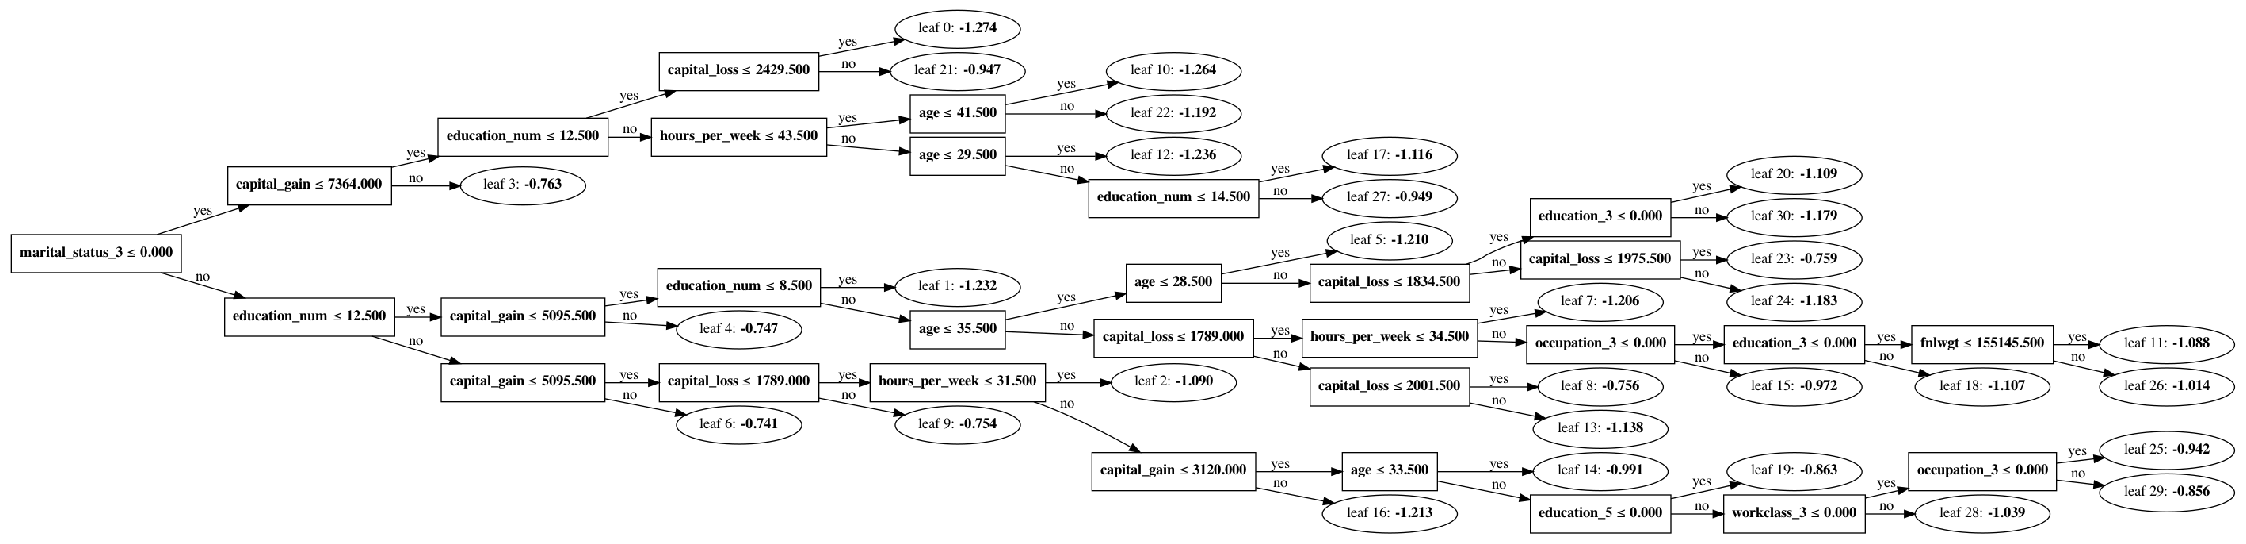

In [69]:
import lightgbm
lightgbm.plot_tree(light)
plt.show()

In [70]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [71]:
light = LGBMClassifier()
rs = RandomizedSearchCV(light, param_distributions=param, cv=5)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11de9a150>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11de96c10>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11de83610>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                                       

In [72]:
y_pred = rs.predict(X_test)
metricss(y_test, y_pred)

Classification Report
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4908
        >50K       0.78      0.67      0.72      1605

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

Confusion Matrix
 [[4606  302]
 [ 532 1073]]


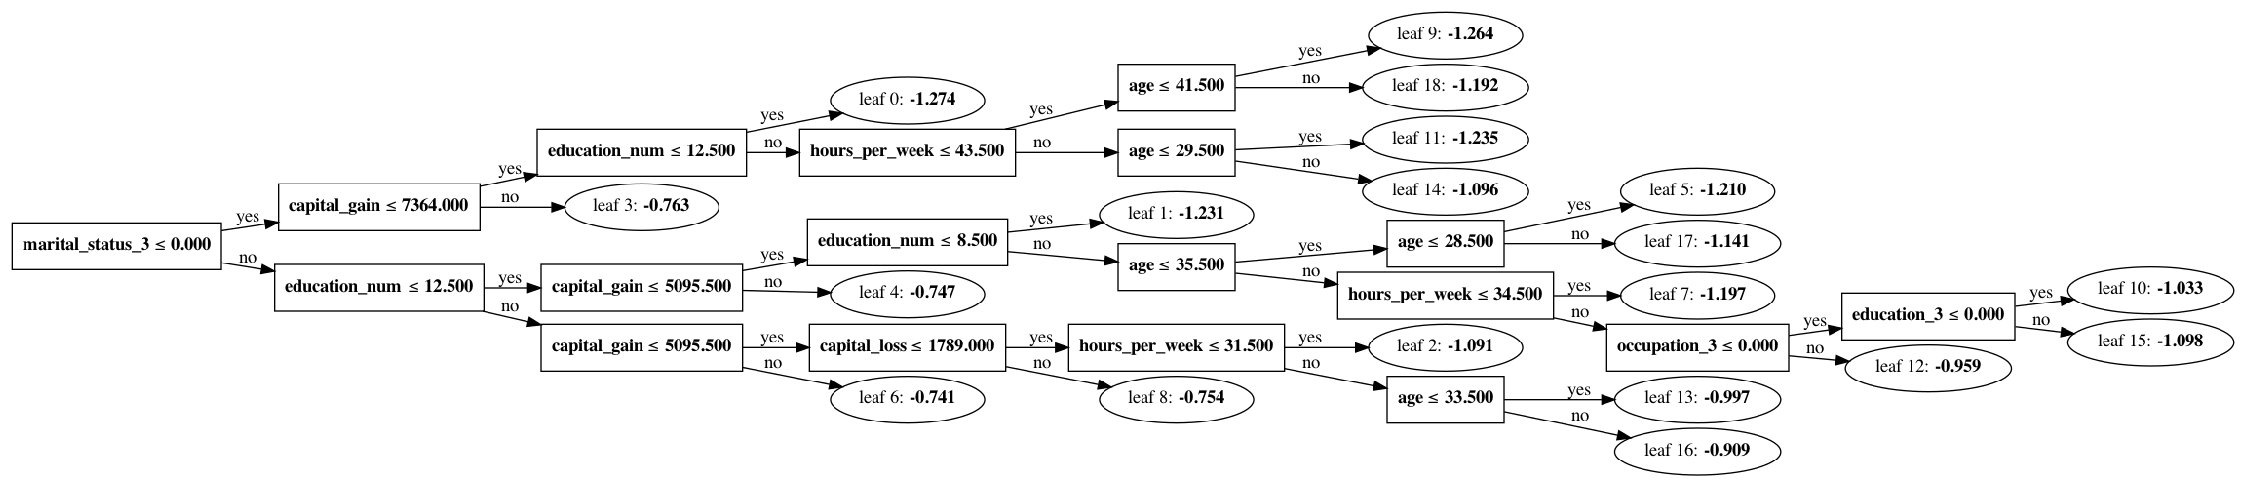

In [73]:
lightgbm.plot_tree(rs.best_estimator_)
plt.show()

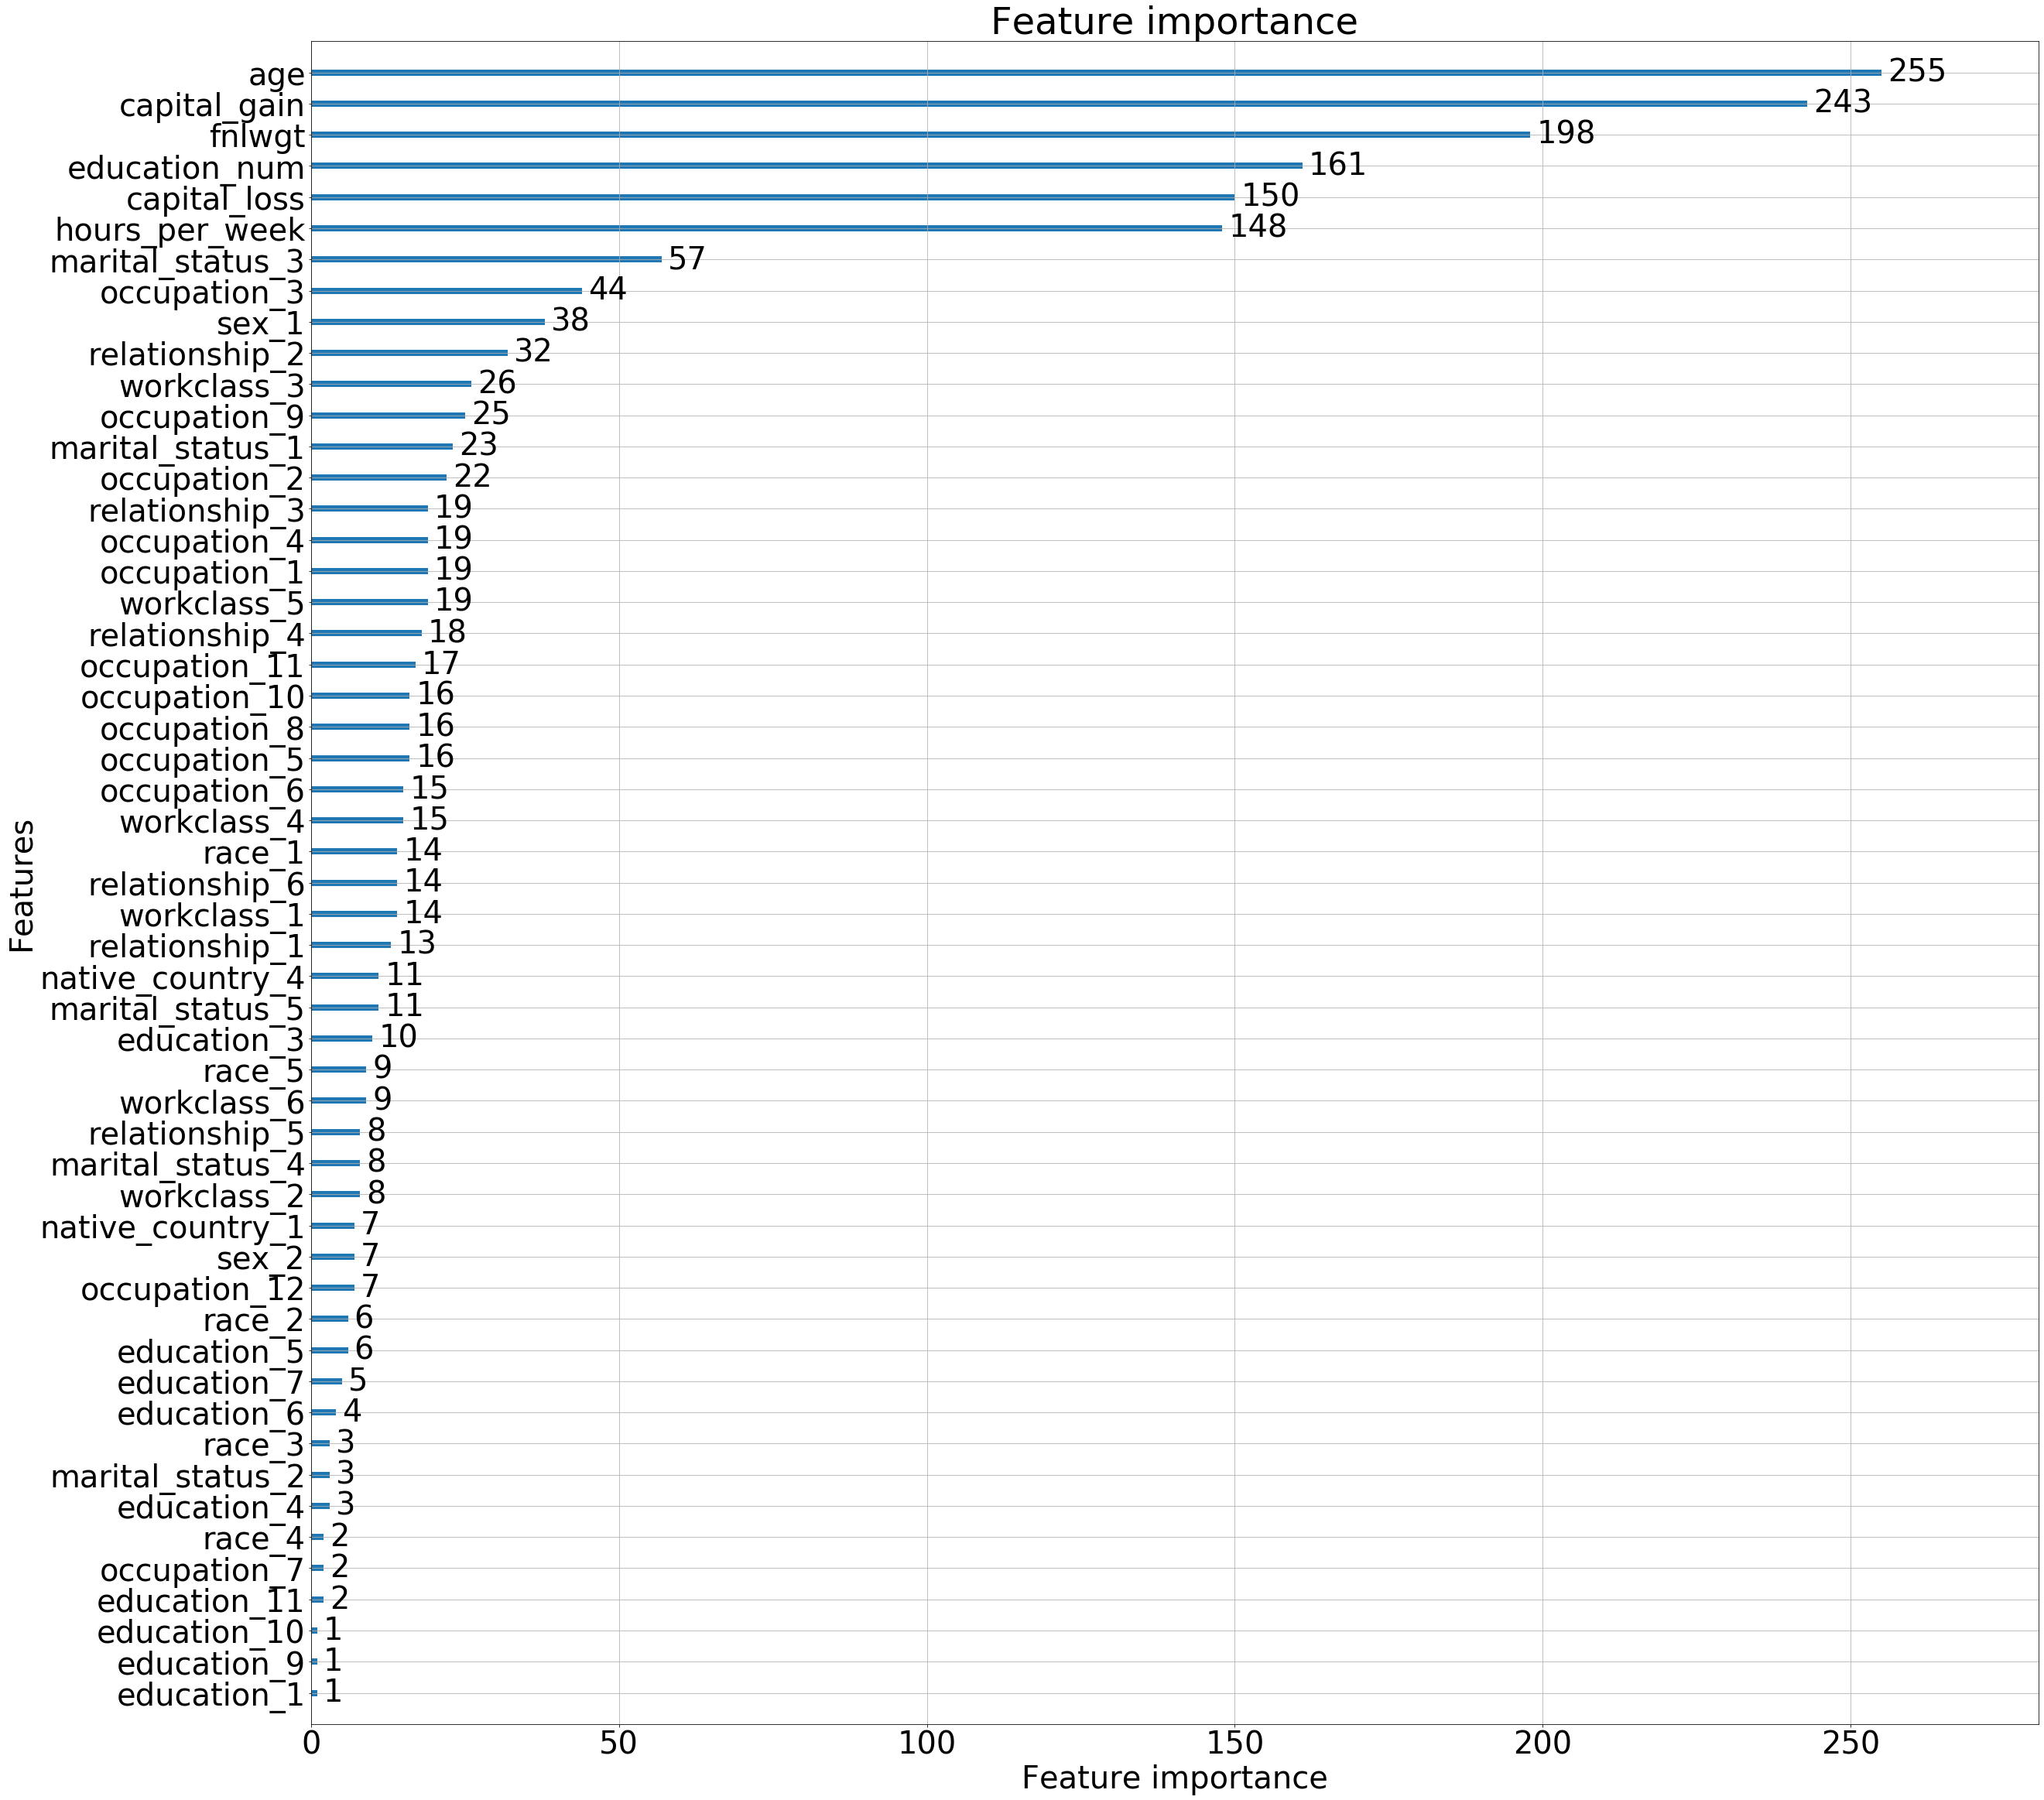

In [74]:

lightgbm.plot_importance(rs.best_estimator_)
plt.rcParams['font.size'] = 50
plt.show()

## 7) catboost


In [75]:
from catboost import CatBoostClassifier

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Classification Report
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4908
        >50K       0.79      0.68      0.73      1605

    accuracy                           0.88      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.88      0.87      6513

Confusion Matrix
 [[4619  289]
 [ 521 1084]]


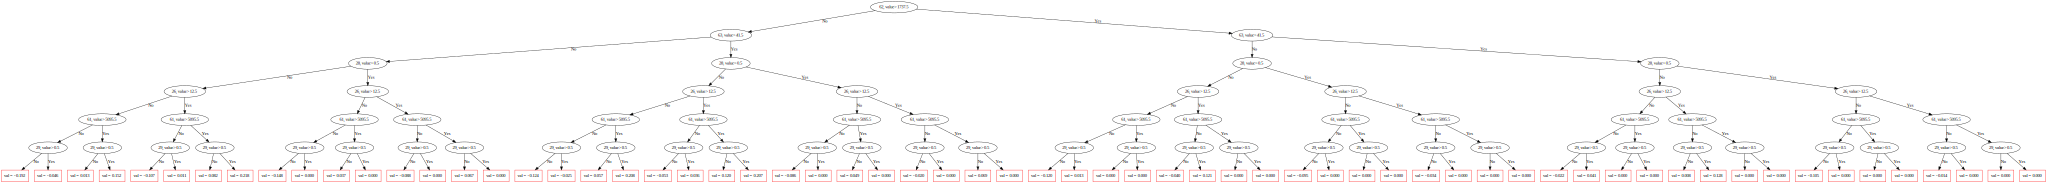

In [76]:
cat = CatBoostClassifier(verbose=False)
cat.fit(X_train, y_train, plot=True)
y_pred = cat.predict(X_test)
metricss(y_test, y_pred)
cat.plot_tree(tree_idx=0)


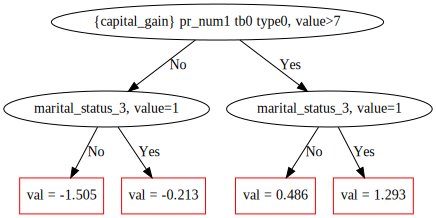

In [77]:
from catboost import CatBoostClassifier, Pool

is_cat = (X_train.dtypes != float)
for feature, feat_is_cat in is_cat.to_dict().items():
    if feat_is_cat:
        X_train[feature].fillna("NAN", inplace=True)

cat_features_index = np.where(is_cat)[0]
pool = Pool(X_train, y_train, cat_features=cat_features_index, feature_names=list(X_train.columns))

model = CatBoostClassifier(
    max_depth=2, verbose=False, max_ctr_complexity=1, iterations=2).fit(pool)

model.plot_tree(
    tree_idx=0,
    pool=pool
)